In [1]:
!pip install -q accelerate bitsandbytes transformers ftfy gradio tensorboard
!pip install -q --upgrade git+https://github.com/huggingface/diffusers.git

!git clone https://github.com/huggingface/diffusers.git
%cd diffusers/examples/dreambooth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.

In [2]:
import os

family_guy_dataset_folder = "/kaggle/input/family-guy-lora-data/family_guy_dataset"

file_names = os.listdir(family_guy_dataset_folder)

for file_name in file_names:
    print(file_name)

Image_15.jpeg
Image_22.txt
Image_17.txt
Image_4.jpeg
Image_22.jpeg
Image_14.jpeg
Image_12.jpeg
Image_5.png
Image_24.txt
Image_20.txt
Image_20.jpeg
Image_21.jpeg
Image_21.txt
Image_13.jpeg
Image_23.txt
Image_13.txt
Image_4.txt
Image_23.jpeg
Image_18.txt
Image_7.txt
Image_11.txt
Image_27.jpeg
Image_8.txt
Image_27.txt
Image_26.txt
Image_1.txt
Image_16.txt
Image_5.txt
Image_12.txt
Image_18.jpeg
Image_25.jpeg
Image_2.txt
Image_1.jpeg
Image_10.jpeg
Image_8.jpeg
Image_26.jpeg
Image_7.jpeg
Image_19.jpeg
Image_19.txt
Image_10.txt
Image_25.txt
Image_11.jpeg
Image_14.txt
Image_15.txt
Image_24.jpeg
Image_16.jpeg
Image_2.jpeg
Image_3.jpeg
Image_3.txt
Image_17.jpeg


In [3]:
import shutil

source_path = "/kaggle/input/family-guy-lora-data/family_guy_dataset"
working_path = "/kaggle/working/family_guy_dataset"

os.makedirs(working_path, exist_ok=True)

for filename in os.listdir(source_path):
    full_file_name = os.path.join(source_path, filename)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, working_path)

print(f"Files copied to {working_path}")

dataset_path = working_path
trigger_phrase = "familyguy style " 

print(f"Checking captions in: {dataset_path}")
count = 0
for filename in os.listdir(dataset_path):
    if filename.endswith(".txt"):
        filepath = os.path.join(dataset_path, filename)
        try:
            with open(filepath, 'r+', encoding='utf-8') as f:
                content = f.read()
                if not content.startswith(trigger_phrase):
                    print(f"Adding trigger phrase to: {filename}")
                    f.seek(0, 0) 
                    f.write(trigger_phrase + content)
                    count += 1
                else:
                    pass
        except Exception as e:
            print(f"Could not process file {filename}: {e}")

print(f"Finished. Added trigger phrase to {count} files.")

Files copied to /kaggle/working/family_guy_dataset
Checking captions in: /kaggle/working/family_guy_dataset
Adding trigger phrase to: Image_4.txt
Adding trigger phrase to: Image_23.txt
Adding trigger phrase to: Image_10.txt
Adding trigger phrase to: Image_1.txt
Adding trigger phrase to: Image_25.txt
Adding trigger phrase to: Image_21.txt
Adding trigger phrase to: Image_14.txt
Adding trigger phrase to: Image_2.txt
Adding trigger phrase to: Image_22.txt
Adding trigger phrase to: Image_13.txt
Adding trigger phrase to: Image_16.txt
Adding trigger phrase to: Image_3.txt
Adding trigger phrase to: Image_8.txt
Adding trigger phrase to: Image_26.txt
Adding trigger phrase to: Image_18.txt
Adding trigger phrase to: Image_24.txt
Adding trigger phrase to: Image_27.txt
Adding trigger phrase to: Image_12.txt
Adding trigger phrase to: Image_17.txt
Adding trigger phrase to: Image_15.txt
Adding trigger phrase to: Image_7.txt
Adding trigger phrase to: Image_19.txt
Adding trigger phrase to: Image_5.txt
Ad

In [4]:
original_data_dir = "/kaggle/working/family_guy_dataset"
clean_image_dir = "/kaggle/working/family_guy_images_only"
image_extensions = {".png", ".jpg", ".jpeg", ".bmp", ".webp", ".gif"} 

if os.path.exists(clean_image_dir):
    print(f"Removing existing directory: {clean_image_dir}")
    shutil.rmtree(clean_image_dir)
print(f"Creating clean directory: {clean_image_dir}")
os.makedirs(clean_image_dir)

copied_count = 0
print(f"Copying images from {original_data_dir} to {clean_image_dir}...")
for filename in os.listdir(original_data_dir):
    source_path = os.path.join(original_data_dir, filename)
    if os.path.isfile(source_path) and os.path.splitext(filename)[1].lower() in image_extensions:
        destination_path = os.path.join(clean_image_dir, filename)
        shutil.copy2(source_path, destination_path) 
        copied_count += 1

print(f"Finished copying {copied_count} image files.")

print("\nContents of the clean directory:")
os.system(f"ls -l {clean_image_dir}")

Creating clean directory: /kaggle/working/family_guy_images_only
Copying images from /kaggle/working/family_guy_dataset to /kaggle/working/family_guy_images_only...
Finished copying 25 image files.

Contents of the clean directory:
total 1220
-rw-r--r-- 1 root root  33595 Apr 26 15:28 Image_10.jpeg
-rw-r--r-- 1 root root  43854 Apr 26 15:28 Image_11.jpeg
-rw-r--r-- 1 root root  29044 Apr 26 15:28 Image_12.jpeg
-rw-r--r-- 1 root root  34115 Apr 26 15:28 Image_13.jpeg
-rw-r--r-- 1 root root  38785 Apr 26 15:28 Image_14.jpeg
-rw-r--r-- 1 root root  45694 Apr 26 15:28 Image_15.jpeg
-rw-r--r-- 1 root root  21432 Apr 26 15:28 Image_16.jpeg
-rw-r--r-- 1 root root  36545 Apr 26 15:28 Image_17.jpeg
-rw-r--r-- 1 root root  35006 Apr 26 15:28 Image_18.jpeg
-rw-r--r-- 1 root root  52056 Apr 26 15:28 Image_19.jpeg
-rw-r--r-- 1 root root  34985 Apr 26 15:28 Image_1.jpeg
-rw-r--r-- 1 root root  20455 Apr 26 15:28 Image_20.jpeg
-rw-r--r-- 1 root root  43346 Apr 26 15:28 Image_21.jpeg
-rw-r--r-- 1 root

0

In [5]:
%%bash

export MODEL_NAME="runwayml/stable-diffusion-v1-5"
export INSTANCE_DATA_DIR="/kaggle/working/family_guy_images_only" 
export OUTPUT_DIR="/kaggle/working/familyguy-lora-output"

export INSTANCE_PROMPT="a photo in familyguy style" 
export RESOLUTION=512
export TRAIN_BATCH_SIZE=1
export GRADIENT_ACCUMULATION_STEPS=2
export LEARNING_RATE=1e-4
export LR_SCHEDULER="constant"
export LR_WARMUP_STEPS=0
export MAX_TRAIN_STEPS=1000
export CHECKPOINTING_STEPS=500
export RANK=8

export MIXED_PRECISION="fp16"
export SCRIPT_PATH="/kaggle/working/diffusers/examples/dreambooth/train_dreambooth_lora.py"

accelerate launch $SCRIPT_PATH \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --instance_data_dir=$INSTANCE_DATA_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="$INSTANCE_PROMPT" \
  --resolution=$RESOLUTION \
  --train_batch_size=$TRAIN_BATCH_SIZE \
  --gradient_accumulation_steps=$GRADIENT_ACCUMULATION_STEPS \
  --learning_rate=$LEARNING_RATE \
  --lr_scheduler=$LR_SCHEDULER \
  --lr_warmup_steps=$LR_WARMUP_STEPS \
  --max_train_steps=$MAX_TRAIN_STEPS \
  --use_8bit_adam \
  --mixed_precision=$MIXED_PRECISION \
  --rank=$RANK \
  --checkpointing_steps=$CHECKPOINTING_STEPS \
  --seed=42 \
  # --train_text_encoder \
  # --enable_xformers_memory_efficient_attention \
  # --validation_prompt="familyguy style, Homer Simpson visiting Quahog" \
  # --num_validation_images=2 \
  # --validation_steps=200

echo "Training script finished."

Training script finished.


2025-04-26 15:29:19.958746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745681360.152086     114 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745681360.220500     114 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
{'timestep_spacing', 'prediction_type', 'dynamic_thresholding_ratio', 'thresholding', 'variance_type', 'clip_sample_range', 'rescale_betas_zero_snr', 'sample_max_value'} was not found in config. Values will be initialized to default values.
{'use_quant_conv', 'shift_factor', 'forc

2025-04-26 16:14:04.238391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745684044.260670      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745684044.267447      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Trying to load LoRA from: /kaggle/working/familyguy-lora-output


No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


LoRA loaded from main output directory.

Generating test image with prompt: familyguy style a futuristic robot standing in a park


  0%|          | 0/30 [00:00<?, ?it/s]

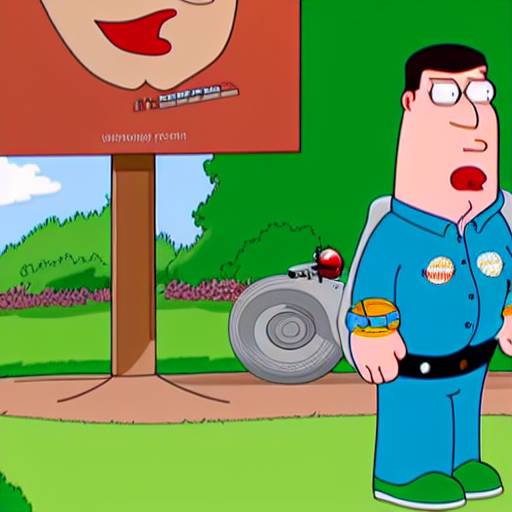

In [6]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from PIL import Image

base_model_path = "runwayml/stable-diffusion-v1-5"
lora_output_path = "/kaggle/working/familyguy-lora-output"
trigger_word = "familyguy style"

device = "cuda" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

pipe = StableDiffusionPipeline.from_pretrained(base_model_path, torch_dtype=torch_dtype)

try:
    print(f"Trying to load LoRA from: {lora_output_path}")
    pipe.load_lora_weights(lora_output_path) 
    print("LoRA loaded from main output directory.")
except Exception as e:
    print(f"Could not load LoRA from main directory: {e}")
    try:
        last_checkpoint_path = f"{lora_output_path}/checkpoint-{MAX_TRAIN_STEPS}"
        print(f"Trying to load LoRA from checkpoint: {last_checkpoint_path}")
        pipe.load_lora_weights(last_checkpoint_path)
        print(f"LoRA loaded from {last_checkpoint_path}.")
    except Exception as e2:
        print(f"Could not load LoRA from checkpoint either: {e2}")
        print("!!! LoRA loading failed. Check the output directory structure. !!!")

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to(device)

prompt = f"{trigger_word} a futuristic robot standing in a park"
negative_prompt = "low quality, blurry, deformed"
num_steps = 30
guidance_scale = 7.5

print(f"\nGenerating test image with prompt: {prompt}")

with torch.autocast(device):
    image = pipe(
        prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=num_steps,
        guidance_scale=guidance_scale
    ).images[0]

display(image)

del pipe
import gc
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()